In [1]:
import snowflake.connector
import pandas as pd


In [2]:
# Establish connection
conn = snowflake.connector.connect(
    user='davidfx',
    password='Demopurpose999',
    account='mzgjsoo-lq51293',
    warehouse='COMPUTE_WH',
    database='SNOWFLAKE_SAMPLE_DATA',
    schema='TPCH_SF1'       
)

# Create a cursor object
cur = conn.cursor()

In [3]:
# Query the dataset
query = """
SELECT *
FROM "TPCH_SF1"."CUSTOMER"
LIMIT 100
"""
cur.execute(query)

In [4]:
# Fetch the results into a dataframe
df = cur.fetch_pandas_all()

# Combine with your dataframe
summary = df.describe()

# Close the connection
cur.close()
conn.close()

print(df.info())
# Check for missing values
print(df.isnull().sum())

print(df.head())
print(df.describe())

dfa=df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   C_CUSTKEY     100 non-null    int32  
 1   C_NAME        100 non-null    object 
 2   C_ADDRESS     100 non-null    object 
 3   C_NATIONKEY   100 non-null    int8   
 4   C_PHONE       100 non-null    object 
 5   C_ACCTBAL     100 non-null    float64
 6   C_MKTSEGMENT  100 non-null    object 
 7   C_COMMENT     100 non-null    object 
dtypes: float64(1), int32(1), int8(1), object(5)
memory usage: 5.3+ KB
None
C_CUSTKEY       0
C_NAME          0
C_ADDRESS       0
C_NATIONKEY     0
C_PHONE         0
C_ACCTBAL       0
C_MKTSEGMENT    0
C_COMMENT       0
dtype: int64
   C_CUSTKEY              C_NAME                            C_ADDRESS  \
0      60001  Customer#000060001                           9Ii4zQn9cX   
1      60002  Customer#000060002                     ThGBMjDwKzkoOxhz   
2      60003  C

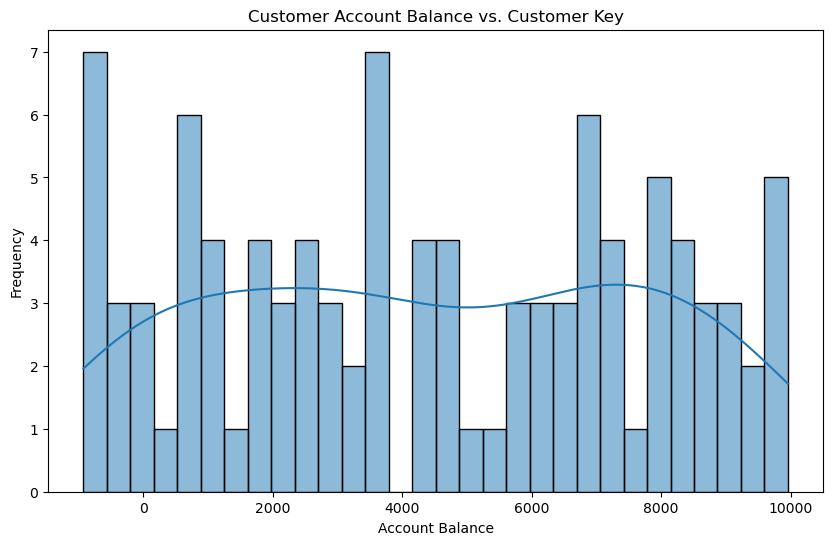

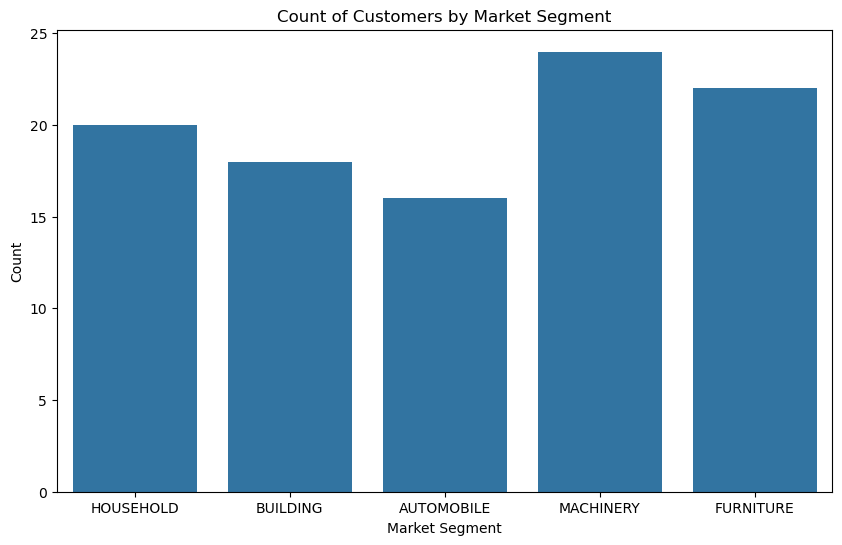

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of C_ACCTBAL
plt.figure(figsize=(10, 6))
sns.histplot(df['C_ACCTBAL'], kde=True, bins=30)
plt.title('Customer Account Balance vs. Customer Key')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.show()

# Distribution of C_MKTSEGMENT
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='C_MKTSEGMENT')
plt.title('Count of Customers by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.show()


             C_CUSTKEY  C_NATIONKEY  C_ACCTBAL
C_CUSTKEY     1.000000     0.069676  -0.002823
C_NATIONKEY   0.069676     1.000000   0.118000
C_ACCTBAL    -0.002823     0.118000   1.000000


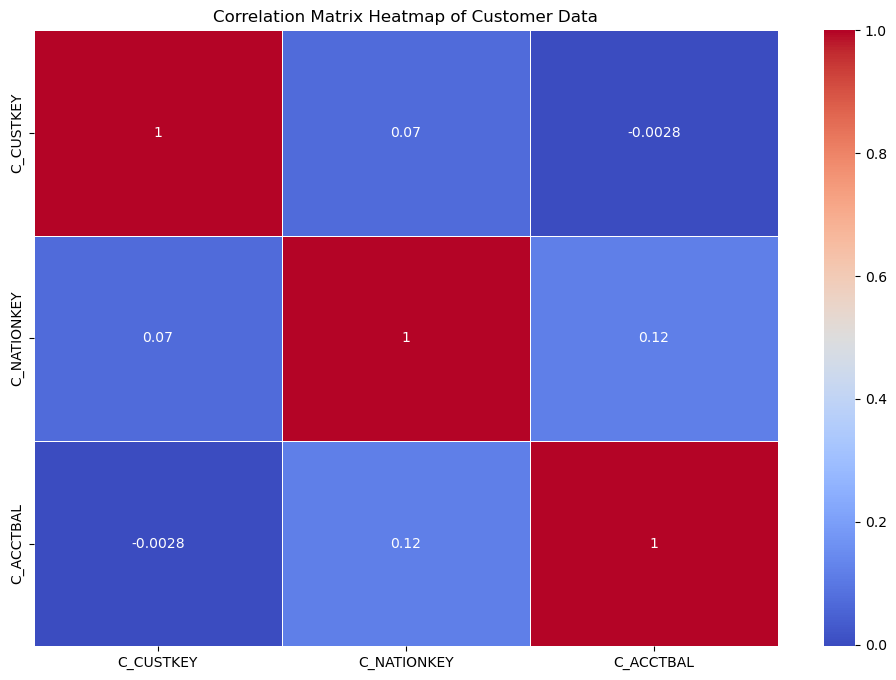

In [6]:
import numpy as np

# Correlation Matrix Heatmap of Customer Data
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Display the correlation matrix
print(corr_matrix)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap of Customer Data')
plt.show()